# XZ Cyg: Working with TESS observations of an RR Lyrae variable

The RR Lyrae variable star XZ Cyg has been observed by the TESS mission in Sectors 14, 15, 16, 20, and 23.  This notebook shows how to get 10x10 TESScut observations from the Mikulski Archive for Space Telescopes (MAST) at the Space Telescope Science Institute (STScI) using Python3 packages and functions.  Finder charts are created using the  **mkpy3** package.  The period of this RR Lyrae variable star is determined from the raw TESS 30-minute light curve using the **lightkurve** package.  Based on the analyss presented in this Jupyter notebook of the raw TESS light curve, **XZ Cyg has a period of 0.470399 days**. In comparison, the (AAVSO International) Variable Star indeX (VSX) catalog gives the period as 0.466600 days.

In [1]:
import os
print(os.getcwd(),' =$PWD')
nb = 'nb_xz_cyg_tess_v5.ipynb'
version = '2020OCT01T1702 v4.11'
print(nb,version,'=nb')

/Users/kmighell/top/github/mkpy3/mkpy3  =$PWD
nb_xz_cyg_tess_v5.ipynb 2020OCT01T1702 v4.11 =nb


In [2]:
import sys

Import lightkurve:

In [3]:
try:
    import lightkurve as lk
except Exception:
    print('\n***** ERROR *****\n')
    print('The Python package lightkurve needs to be installed.\n')
    print('This is the installation command for lightkurve using pip:\n')
    print('pip install lightkurve --upgrade\n')
    print('For further installation details see the lightkurve homepage:\n')
    print('https://docs.lightkurve.org/about/install.html\n')
    sys.exit(1)
# pass:try
print(lk.__version__, ' : lightkurve version')

2.0a2.dev  : lightkurve version


Import the matplotlib plotting package:

In [4]:
import matplotlib.pyplot as plt

Import the required mkpy3 modules (GitHub repository: https://github.com/KenMighell/mkpy3) :

In [5]:
import mkpy3_plot_add_compass_rose_v4 as km1
import mkpy3_tess_tpf_overlay_v6 as km2

Show all of the TESS observations of the RR Lyrae variable star XZ Cyg:

In [6]:
target = 'XZ Cyg'
search_results = lk.search_tesscut(target)
n_products = len(search_results)
try:
    assert n_products >= 1
except Exception:
    print("\n*** ERROR *** NO DATA PRODUCTS FOUND FOR TARGET '%s'\n" % target)
    sys.exit(1)
# pass:try
search_results

#,observation,author,target_name,productFilename,distance
0,TESS Sector 14,MAST,XZ Cyg,TESSCut,0.0
1,TESS Sector 15,MAST,XZ Cyg,TESSCut,0.0
2,TESS Sector 16,MAST,XZ Cyg,TESSCut,0.0
3,TESS Sector 20,MAST,XZ Cyg,TESSCut,0.0
4,TESS Sector 23,MAST,XZ Cyg,TESSCut,0.0


Show the search results:

In [7]:
search_results

#,observation,author,target_name,productFilename,distance
0,TESS Sector 14,MAST,XZ Cyg,TESSCut,0.0
1,TESS Sector 15,MAST,XZ Cyg,TESSCut,0.0
2,TESS Sector 16,MAST,XZ Cyg,TESSCut,0.0
3,TESS Sector 20,MAST,XZ Cyg,TESSCut,0.0
4,TESS Sector 23,MAST,XZ Cyg,TESSCut,0.0


Get a 10x10 TESScut cutout of the TargetPixelFile (TPF) of Sector 14 observation:

In [8]:
tpf = search_results[0].download(cutout_size=10, quality_bitmask=0)
tpf

TessTargetPixelFile(TICID: XZ Cyg)

Show the standard lightkurve TPF plot:

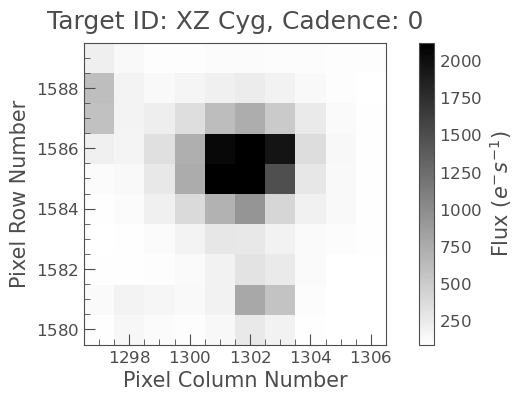

In [9]:
tpf.plot(cmap='gray_r');

Where is North?  And where is East?

Show North and East using a compass rose (long arm points North and the short arm points East):

mkpy3_plot1.png <--- plot file written


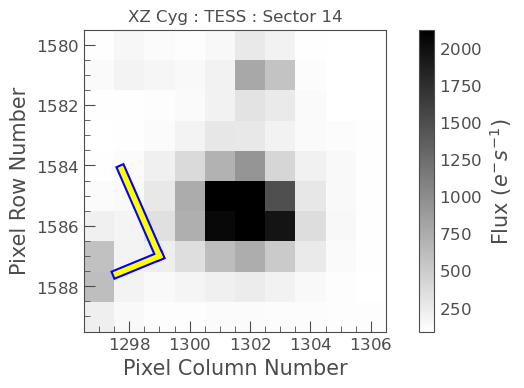

In [10]:
# TPF plot with a compass rose using mkpy3
ax = tpf.plot(cmap='gray_r')
ax.set_title(target+' : TESS : Sector 14')

# add a compass rose
import mkpy3_plot_add_compass_rose_v4 as km1
km1.mkpy3_plot_add_compass_rose_v4(ax=ax, wcs=tpf.wcs, north_arm_arcsec=63, cx=1299, cy=1587)

# invert the Y axis:
ax.invert_yaxis()

oplot = 'mkpy3_plot1.png'
plt.savefig(oplot, dpi=150, bbox_inches = "tight")
print(oplot, '<--- plot file written')

Note that the Y axis is inverted to show North (the long arm of the compass rose) pointing (approximately) up.

Rotate the entire plot so that the North arm of the compass rose is pointing up:

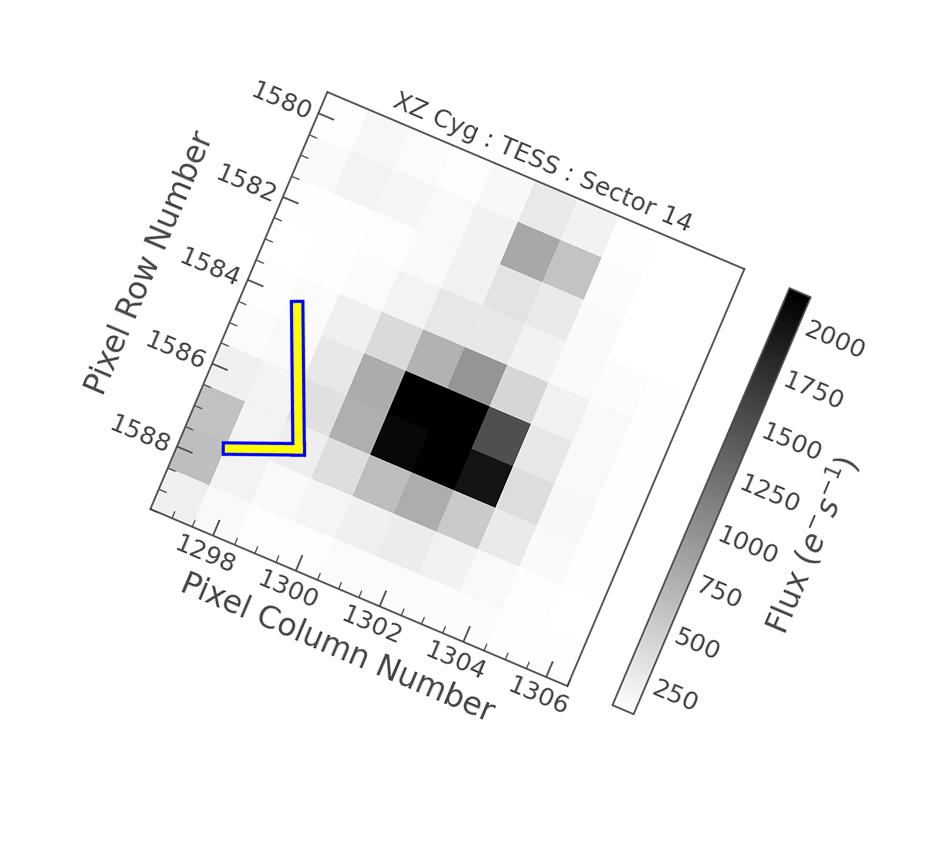

In [11]:
# rotate plot by -23 degrees
from PIL import Image  # pip install Pillow
iplot = 'mkpy3_plot1.png'
oplot = 'mkpy3_plot2.png'
img = Image.open(iplot)
img = img.rotate(-23,expand=True,resample=Image.BICUBIC ) # degrees
img.save(oplot)
#
import IPython.display as ipd
ipd.Image(filename=oplot, width=650)

Now show the TESScut TPF overlay on the 2MASS-J near-infrared sky survey:


TPF filename: tess-s0014-2-1_293.122090_56.388190_10x10_astrocut.fits
TPF dirname:  /Users/kmighell/.lightkurve-cache/tesscut


0.000000 =radius_arcsec  (0.000000 =shrink)

293.12209 =ra_deg
56.38819 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file written



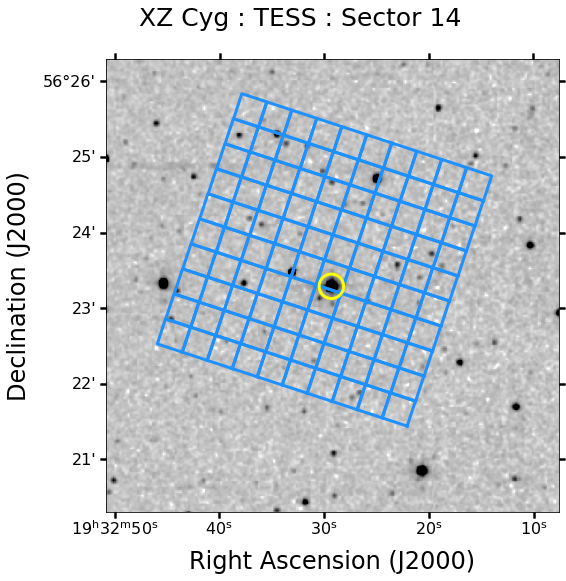

In [12]:
title = 'XZ Cyg : TESS : Sector 14'

import mkpy3_tess_tpf_overlay_v6 as km2
ax = km2.mkpy3_tess_tpf_overlay_v6(tpf=tpf, title=title, shrink=0.0)

Key:  
* The squares show the TESScut TPF pixel overlay.
* The yellow circle shows the target (XY Cyg) which is a RR Lyrae variable star.

Compare this plot with the previous (rotated) plot.

Now show the TPF overlay with objects from the GAIA DR2 (cyan circles) and VSX (green X) catalogs:


TPF filename: tess-s0014-2-1_293.122090_56.388190_10x10_astrocut.fits
TPF dirname:  /Users/kmighell/.lightkurve-cache/tesscut


254.558441 =radius_arcsec  (1.000000 =shrink)

False =print_gaia_dr2
^--- set this keyword argument to True to print the GAIA DR2 catalog results.

True =print_vsx
^--- set this keyword argument to False to *not* print the VSX catalog results.


# VSX : AAVSO International Variable Star indeX
# n      sep    RAJ2000      DEJ2000       Period     VSX_max   VSX_min  VSX_Name      VSX_Type
#   [arcsec]    [deg]        [deg]         [days]     [mag]     [mag]
  1    0.050  293.1221200   56.3881900     0.466600     8.900    10.160 'XZ Cyg' 'RRAB/BL'

# VSX : AAVSO International Variable Star indeX
# n   RAJ2000       DEJ2000        RAJ2000        DEJ2000
#     [deg]         [deg]          [hms]          [dms]
  1  293.1221200   56.3881900   19h32m29.3088s   56d23m17.484s

293.12209 =ra_deg
56.38819 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file writ

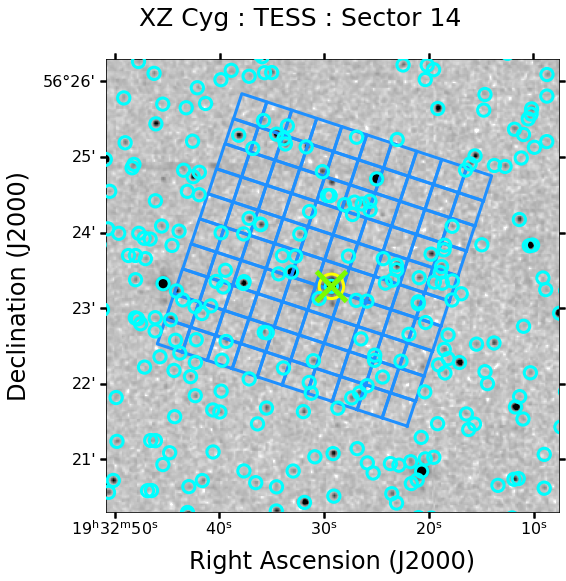

In [13]:
km2.mkpy3_tess_tpf_overlay_v6(tpf=tpf, print_gaia_dr2=False, title=title, percentile=99.5, sexagesimal=True)

Key:  
* The squares show the TESScut TPF pixel overlay.
* The yellow circle shows the target (XY Cyg) which is a RR Lyrae variable star.
* The green X shows the only VSX catalog object (XY Cyg) in the field,
* GAIA DR2 catalog stars in the field are shown as cyan circles.

Show the VSX target with a green X:


TPF filename: tess-s0014-2-1_293.122090_56.388190_10x10_astrocut.fits
TPF dirname:  /Users/kmighell/.lightkurve-cache/tesscut


254.558441 =radius_arcsec  (1.000000 =shrink)

True =print_vsx
^--- set this keyword argument to False to *not* print the VSX catalog results.


# VSX : AAVSO International Variable Star indeX
# n      sep    RAJ2000      DEJ2000       Period     VSX_max   VSX_min  VSX_Name      VSX_Type
#   [arcsec]    [deg]        [deg]         [days]     [mag]     [mag]
  1    0.050  293.1221200   56.3881900     0.466600     8.900    10.160 'XZ Cyg' 'RRAB/BL'

# VSX : AAVSO International Variable Star indeX
# n   RAJ2000       DEJ2000        RAJ2000        DEJ2000
#     [deg]         [deg]          [hms]          [dms]
  1  293.1221200   56.3881900   19h32m29.3088s   56d23m17.484s

293.12209 =ra_deg
56.38819 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file written



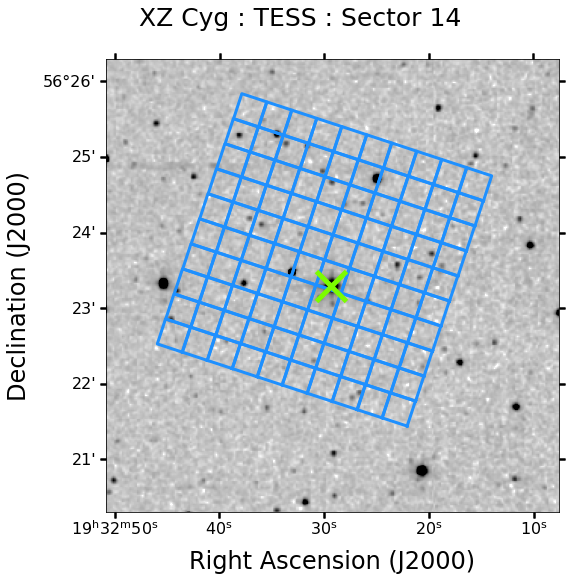

In [14]:
km2.mkpy3_tess_tpf_overlay_v6(tpf=tpf, gaia_dr2_kwargs_str='None', marker_kwargs_str='None',
    title=title, sexagesimal=True)

Create an aperture for the TargetPixelFile:

In [15]:
aper = tpf.create_threshold_mask()

Show a grayscale plot of the TPF with the aperture shown in red:

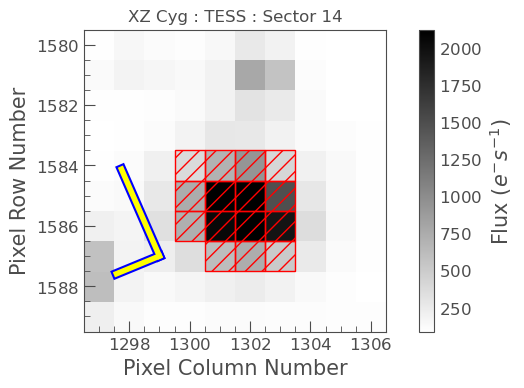

In [16]:
# TPF plot with a compass rose using mkpy3
ax = tpf.plot(aperture_mask=aper, cmap='gray_r')
ax.set_title(target+' : TESS : Sector 14')

# add a compass rose
import mkpy3_plot_add_compass_rose_v4 as km1
km1.mkpy3_plot_add_compass_rose_v4(ax=ax, wcs=tpf.wcs, north_arm_arcsec=63, cx=1299, cy=1587)

# invert the Y axis:
ax.invert_yaxis()

Create a raw light curve using lightkurve's to_lightcurve() method:

In [17]:
raw_lc = tpf.to_lightcurve(aperture_mask=aper)

Show the raw light curve in a scatter plot:

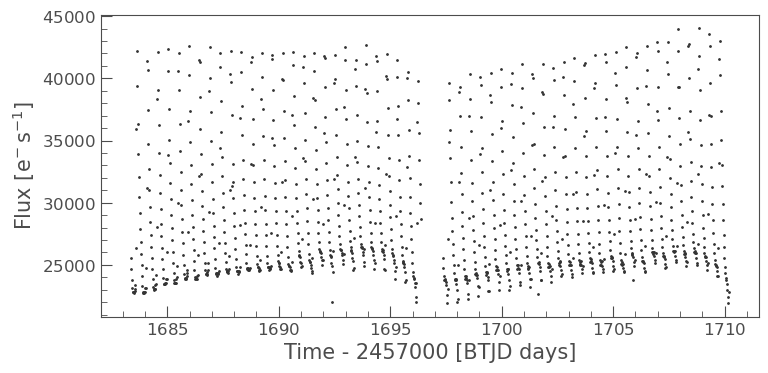

In [18]:
raw_lc.scatter();

It is hard to see the RR Lyrae pattern when the raw light curve is plotted this way.

Redraw the raw as a scatter plot (observations shown in blue) *and* a line plot connecting the observations:

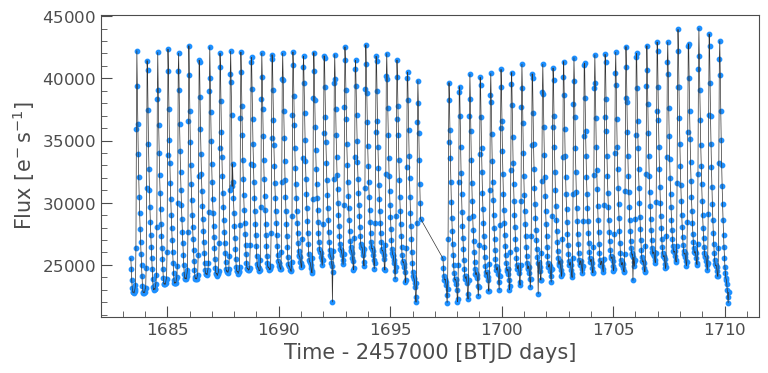

In [19]:
ax = raw_lc.plot()
raw_lc.scatter(ax=ax, color='dodgerblue', s=10);

Now it is much easier to see the RR Lyrae pattern!

Zoom in on the plot and show only 4 days of data:

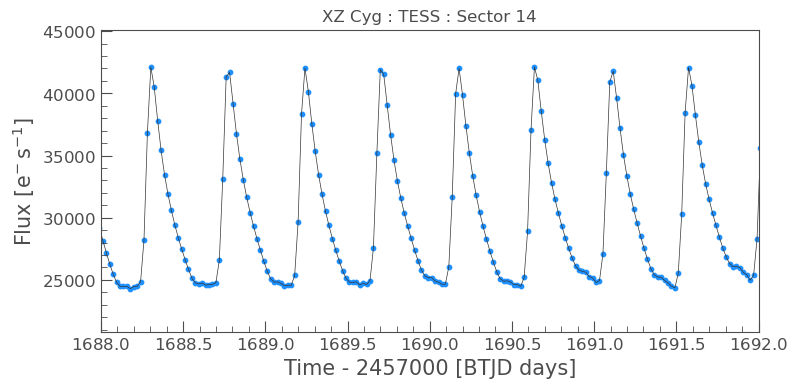

In [20]:
ax = raw_lc.plot()
raw_lc.scatter(ax=ax, color='dodgerblue', s=10)
ax.set_xlim(1688,1692);
ax.set_title('XZ Cyg : TESS : Sector 14');

Create a peridogram from the raw light curve:

In [21]:
pg = raw_lc.to_periodogram(oversample_factor=1)

Plot the periodogram various ways:

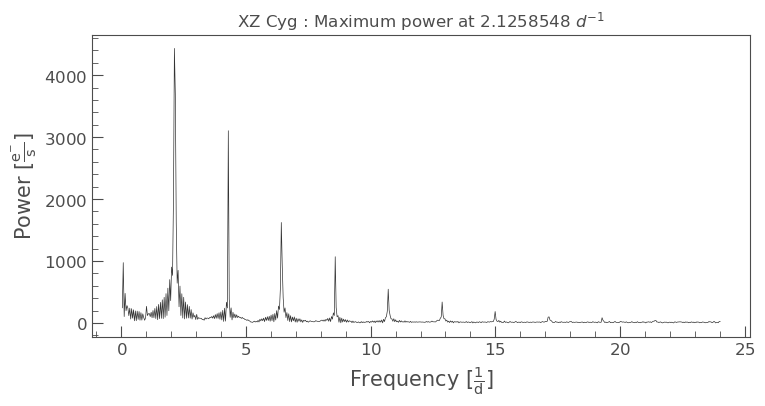

In [22]:
ax = pg.plot()
freq_at_max_power = 1.0/pg.period_at_max_power
title_ = 'XZ Cyg : Maximum power at %.7f $d^{-1}$' % freq_at_max_power.value
ax.set_title(title_);

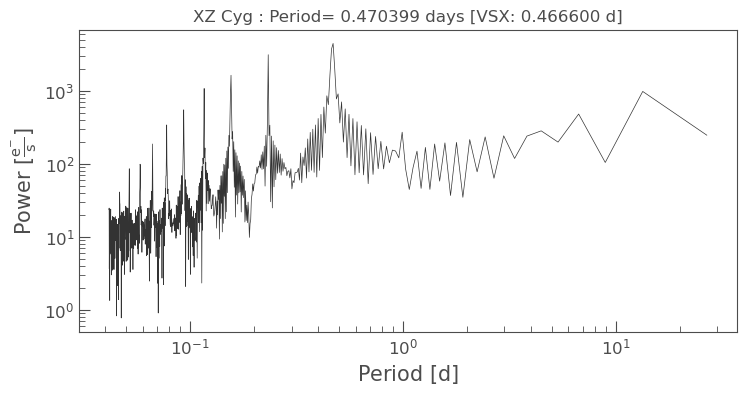

In [23]:
ax = pg.plot(view='period',scale='log');
period_at_max_power = pg.period_at_max_power
title_ = 'XZ Cyg : Period= %.6f days [VSX: 0.466600 d]' % period_at_max_power.value
ax.set_title(title_);

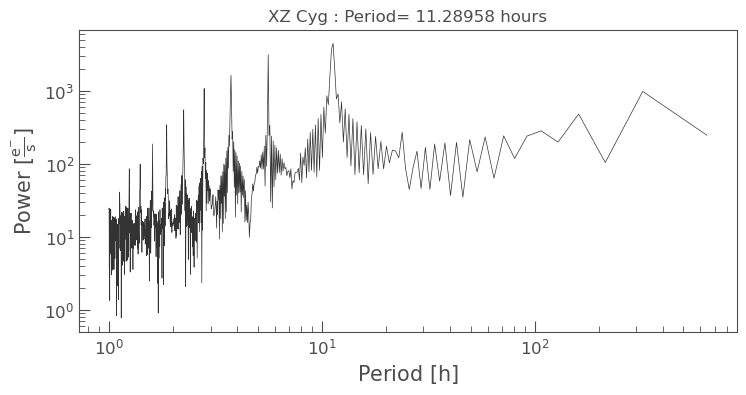

In [24]:
import astropy.units as u
ax = pg.plot(view='period',scale='log',unit=u.hour);
period_at_max_power = pg.period_at_max_power.to(u.hour)
title_ = 'XZ Cyg : Period= %.5f hours' % period_at_max_power.value
ax.set_title(title_);

In [25]:
# EOF